In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_rel
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white as white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error


In [284]:
df2021 = pd.read_csv("world-happiness-report-2021.csv")
df = pd.read_csv("world-happiness-report.csv")
df2020 = df[df['year'] == 2020]

print("df2021 Columns")
print(df2021.columns)
print("df2020 Columns")
print(df2020.columns)
print("df Columns")
print(df.columns)


df2021 Columns
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')
df2020 Columns
Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')
df Columns
Index(['Country name', 'year', 'Life Ladder',

In [285]:
df['year'].value_counts()

year
2017    147
2011    146
2014    145
2019    144
2015    143
2012    142
2016    142
2018    142
2013    137
2010    124
2009    114
2008    110
2007    102
2020     95
2006     89
2005     27
Name: count, dtype: int64

In [286]:
df = pd.read_csv("world-happiness-report.csv")
df2021 = pd.read_csv("world-happiness-report-2021.csv")
df2020 = df[df['year'] == 2020]


df2021 = df2021[df2021.loc[:,:"Perceptions of corruption"].columns.difference(["Standard error of ladder score","upperwhisker","lowerwhisker"])]
df2021 = df2021.sort_index(axis=1)
df2021['year'] = 2021

df2020 = df2020.drop(['Positive affect', 'Negative affect'], axis=1)
df2020 = df2020.rename(columns={"Healthy life expectancy at birth": "Healthy life expectancy", 
                                "Life Ladder": "Ladder score",
                                "Log GDP per capita": "Logged GDP per capita"})
df2020 = pd.merge(df2020, df2021[['Country name', 'Regional indicator']], on='Country name', how='left')
df2020 = df2020.sort_index(axis=1)




In [287]:
df2020['Regional indicator'].value_counts()

Regional indicator
Western Europe                        19
Central and Eastern Europe            16
Sub-Saharan Africa                    14
Latin America and Caribbean           11
Middle East and North Africa          11
Commonwealth of Independent States     7
East Asia                              6
Southeast Asia                         5
North America and ANZ                  4
South Asia                             2
Name: count, dtype: int64

In [288]:
df2021['Regional indicator'].value_counts()

Regional indicator
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: count, dtype: int64

In [289]:
df2020.describe()

,Freedom to make life choices,Generosity,Healthy life expectancy,Ladder score,Logged GDP per capita,Perceptions of corruption,Social support,year
count,94.000000,88.000000,92.000000,95.000000,88.000000,89.000000,95.000000,95.0
mean,0.817766,-0.008011,67.099565,5.840600,9.751330,0.707753,0.838916,2020.0
std,0.097190,0.137050,5.841234,0.978608,0.950918,0.199190,0.105662,0.0
min,0.510000,-0.259000,50.500000,3.160000,7.684000,0.164000,0.507000,2020.0
25%,0.764750,-0.111250,64.575000,5.204500,9.093250,0.609000,0.773000,2020.0
50%,0.824000,-0.038500,67.850000,5.885000,9.881500,0.780000,0.874000,2020.0
75%,0.901500,0.079000,72.250000,6.495000,10.567250,0.845000,0.930000,2020.0
max,0.965000,0.470000,75.200000,7.889000,11.323000,0.961000,0.983000,2020.0


In [290]:
df2021.describe()

,Freedom to make life choices,Generosity,Healthy life expectancy,Ladder score,Logged GDP per capita,Perceptions of corruption,Social support,year
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0
mean,0.791597,-0.015134,64.992799,5.532839,9.432208,0.727450,0.814745,2021.0
std,0.113332,0.150657,6.762043,1.073924,1.158601,0.179226,0.114889,0.0
min,0.382000,-0.288000,48.478000,2.523000,6.635000,0.082000,0.463000,2021.0
25%,0.718000,-0.126000,59.802000,4.852000,8.541000,0.667000,0.750000,2021.0
50%,0.804000,-0.036000,66.603000,5.534000,9.569000,0.781000,0.832000,2021.0
75%,0.877000,0.079000,69.600000,6.255000,10.421000,0.845000,0.905000,2021.0
max,0.970000,0.542000,76.953000,7.842000,11.647000,0.939000,0.983000,2021.0


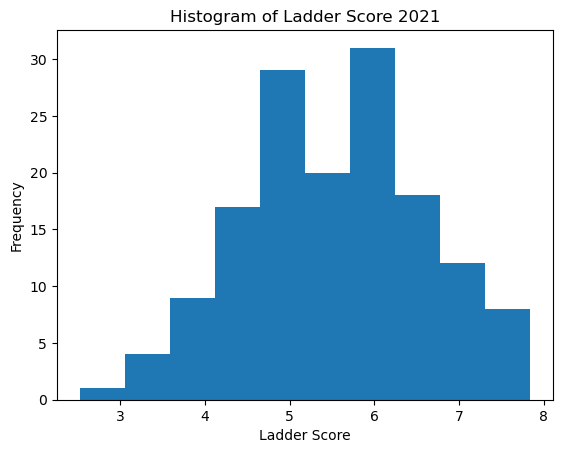

In [291]:
plt.hist(df2021['Ladder score'], bins=10)
plt.xlabel('Ladder Score')
plt.ylabel('Frequency')
plt.title('Histogram of Ladder Score 2021')
plt.show()

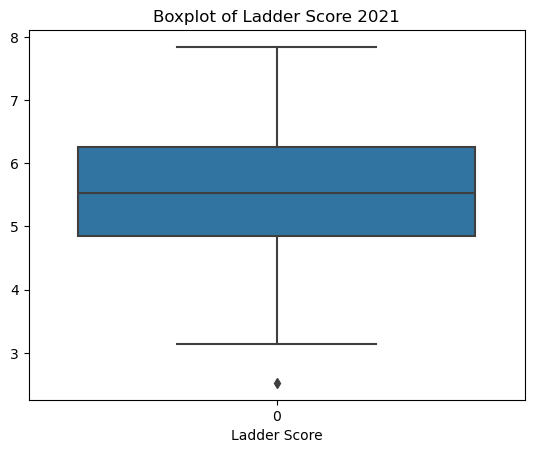

In [292]:
sns.boxplot(df2021['Ladder score'])
plt.xlabel('Ladder Score')
plt.title('Boxplot of Ladder Score 2021')
plt.show()

In [293]:
df_ = pd.concat([df2020, df2021])
print("UPDATED -> df2021")
print(df2021.columns)
print("UPDATED -> df2020")
print(df2020.columns)
print("COMBINED -> df_")
print(df_.columns)

UPDATED -> df2021
Index(['Country name', 'Freedom to make life choices', 'Generosity',
       'Healthy life expectancy', 'Ladder score', 'Logged GDP per capita',
       'Perceptions of corruption', 'Regional indicator', 'Social support',
       'year'],
      dtype='object')
UPDATED -> df2020
Index(['Country name', 'Freedom to make life choices', 'Generosity',
       'Healthy life expectancy', 'Ladder score', 'Logged GDP per capita',
       'Perceptions of corruption', 'Regional indicator', 'Social support',
       'year'],
      dtype='object')
COMBINED -> df_
Index(['Country name', 'Freedom to make life choices', 'Generosity',
       'Healthy life expectancy', 'Ladder score', 'Logged GDP per capita',
       'Perceptions of corruption', 'Regional indicator', 'Social support',
       'year'],
      dtype='object')


In [294]:
print("NULL COUNTS BOTH")
print(df_.isnull().sum())
print("NULL COUNTS 2020")
print(df2020.isnull().sum())
print("NULL COUNTS 2021")
print(df2021.isnull().sum())


NULL COUNTS BOTH
Country name                    0
Freedom to make life choices    1
Generosity                      7
Healthy life expectancy         3
Ladder score                    0
Logged GDP per capita           7
Perceptions of corruption       6
Regional indicator              0
Social support                  0
year                            0
dtype: int64
NULL COUNTS 2020
Country name                    0
Freedom to make life choices    1
Generosity                      7
Healthy life expectancy         3
Ladder score                    0
Logged GDP per capita           7
Perceptions of corruption       6
Regional indicator              0
Social support                  0
year                            0
dtype: int64
NULL COUNTS 2021
Country name                    0
Freedom to make life choices    0
Generosity                      0
Healthy life expectancy         0
Ladder score                    0
Logged GDP per capita           0
Perceptions of corruption       0
Regio

In [295]:

df_regional = df_.groupby(['Regional indicator', 'year'], as_index=False)
regional_mean = df_regional['Ladder score'].mean()
regional_mean = regional_mean.sort_values(by=['year', 'Ladder score'], ascending=[True, False])
regional_mean = regional_mean.reset_index(drop=True)
regional_mean['year'] = regional_mean['year'].astype(str)
regional_mean

,Regional indicator,year,Ladder score
0,North America and ANZ,2020,7.111750
1,Western Europe,2020,6.919421
2,Central and Eastern Europe,2020,6.076688
3,East Asia,2020,5.956500
4,Latin America and Caribbean,2020,5.660182
5,Commonwealth of Independent States,2020,5.641571
6,Middle East and North Africa,2020,5.363455
7,Southeast Asia,2020,5.011400
8,Sub-Saharan Africa,2020,4.761571
9,South Asia,2020,4.752500


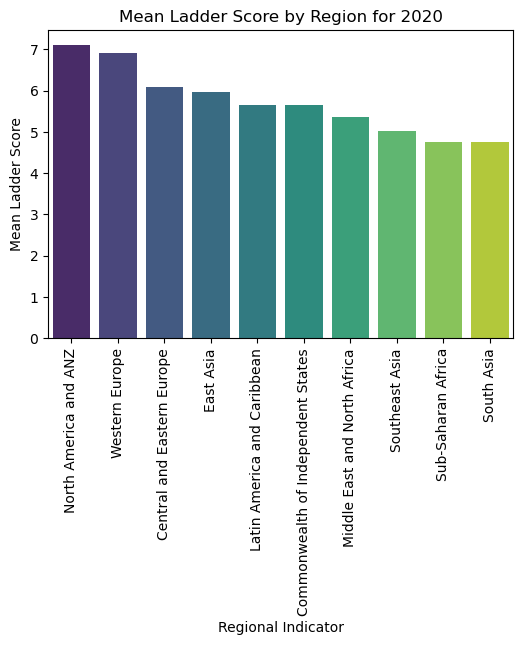

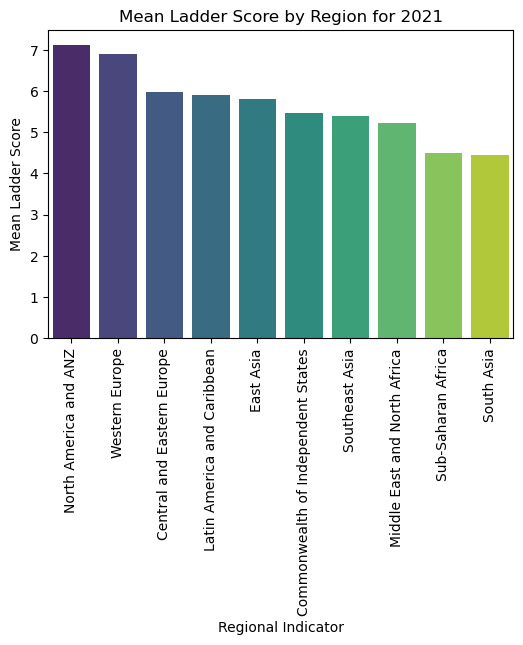

In [296]:
years = regional_mean['year'].unique()

for year in years:
    df_year = regional_mean[regional_mean['year'] == year]
    
    plt.figure(figsize=(6,4))
    sns.barplot(x='Regional indicator', y='Ladder score', data=df_year, palette='viridis')
    plt.xlabel('Regional Indicator')
    plt.ylabel('Mean Ladder Score')
    plt.title(f'Mean Ladder Score by Region for {year}')
    plt.xticks(rotation = 90)
    plt.show()

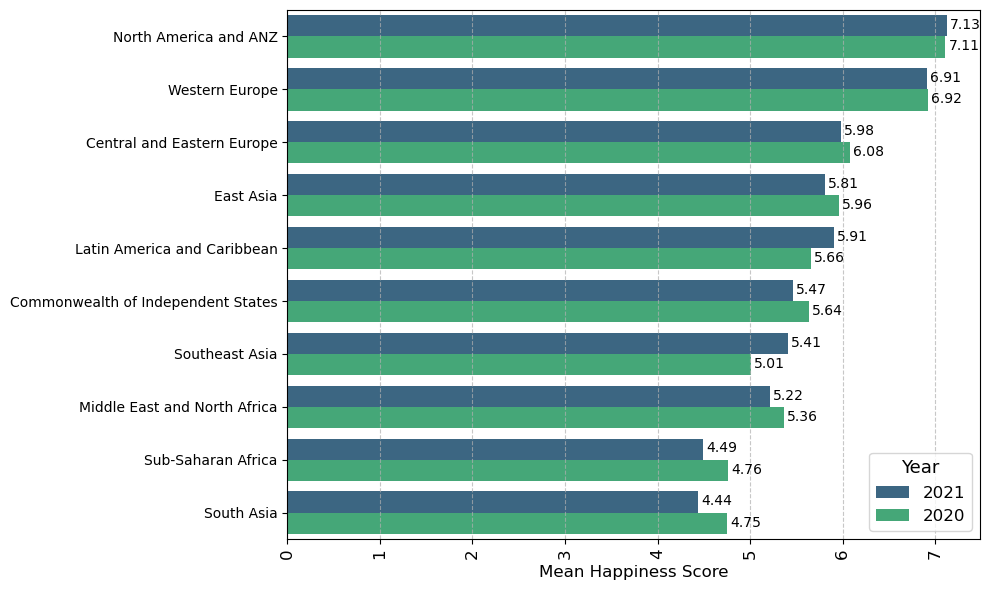

In [297]:
regional_mean_sorted = regional_mean.sort_values(by='Ladder score', ascending=False)
plt.figure(figsize=(10,6))
barplot = sns.barplot(y='Regional indicator', x='Ladder score', hue='year', data=regional_mean_sorted, palette='viridis')
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'), 
                     (p.get_x() + p.get_width()+0.2, p.get_y()+0.45), 
                     ha = 'center', 
                     va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.ylabel('') 
plt.xlabel('Mean Happiness Score', fontsize=12)
plt.xticks(rotation = 90, fontsize=12)
plt.legend(title='Year', title_fontsize='13', fontsize='12')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

c:\Users\maryn\anaconda3\envs\stat_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


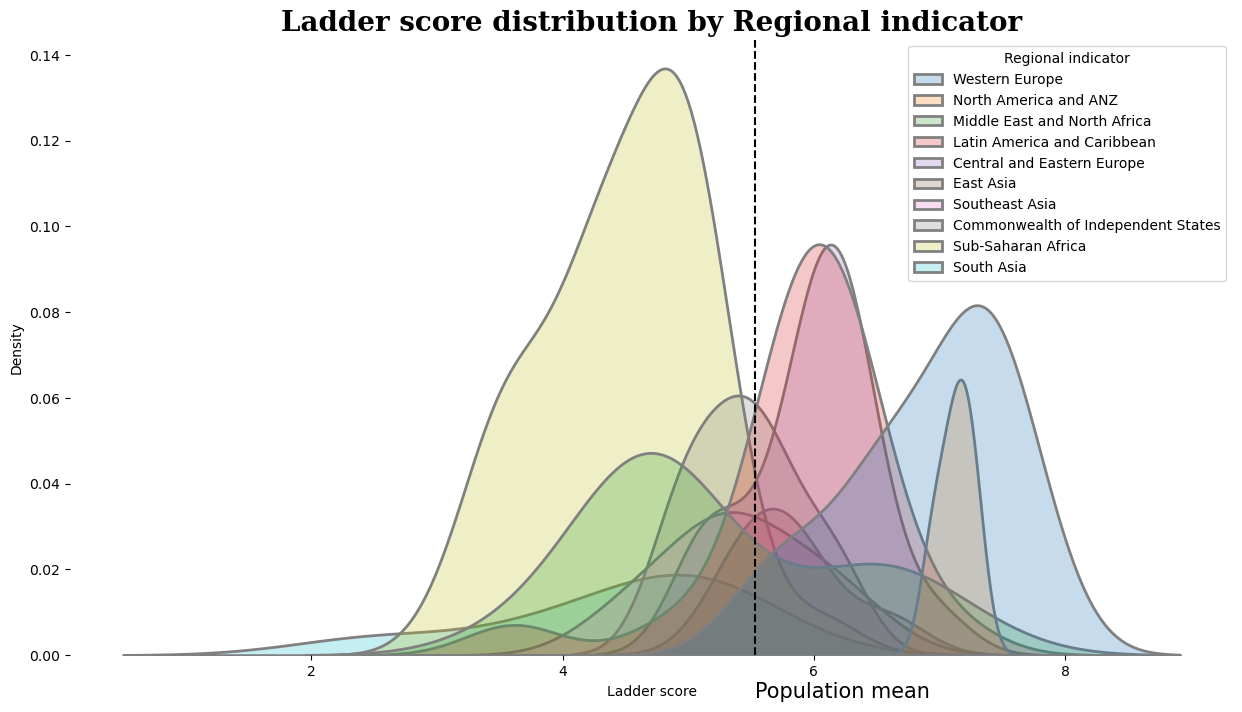

In [298]:
tabela_2021 = df2021
fig=plt.figure(figsize=(15,8))
plt.title("Ladder score distribution by Regional indicator",family='Serif', weight='bold', size=20)
sns.kdeplot(data=tabela_2021, x='Ladder score', fill=True, hue='Regional indicator', linewidth=2, edgecolor='gray', multiple='layer')
plt.axvline(tabela_2021['Ladder score'].mean(), c='black',ls='--')
plt.text(x=tabela_2021['Ladder score'].mean(),y=-0.01,s='Population mean', size=15)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)

<Axes: xlabel='Ladder score', ylabel='Regional indicator'>

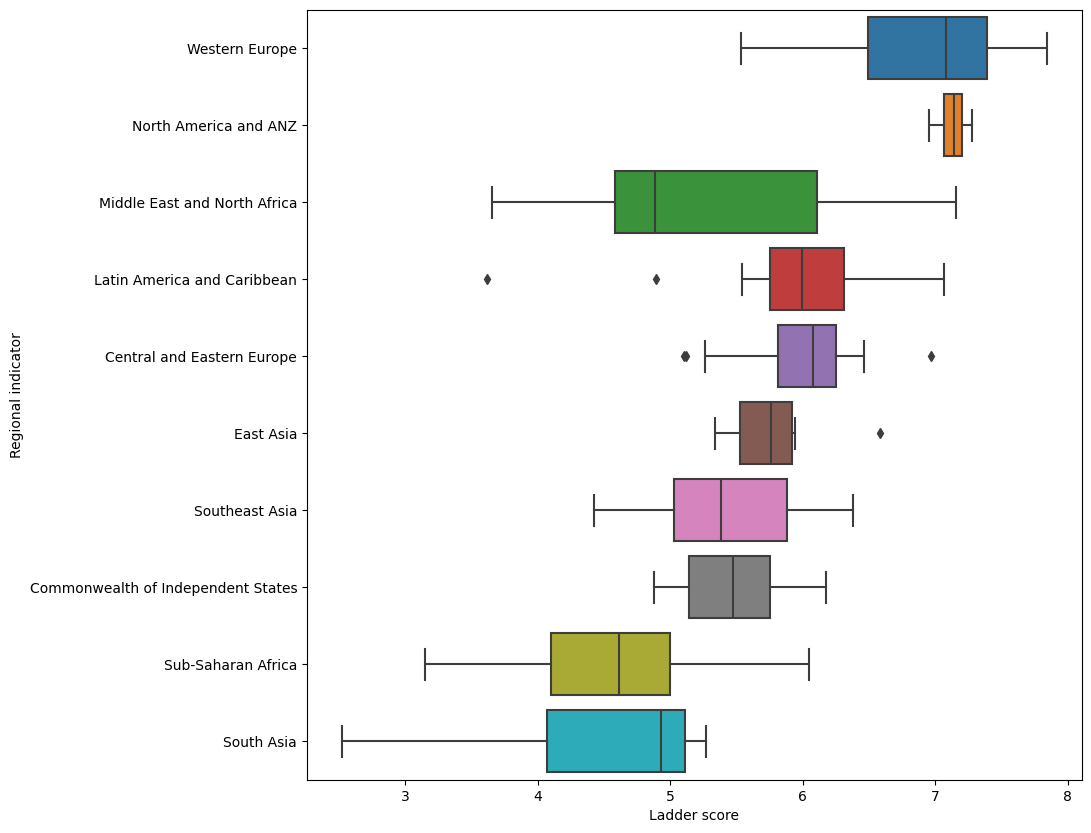

In [299]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y="Regional indicator", x="Ladder score", data=df2021, orient="h", ax=ax)

In [300]:
regions = df2020['Regional indicator'].unique()
ladder_scores = [df2020['Ladder score'][df2020['Regional indicator'] == region] for region in regions]
f_stat, p_value = f_oneway(*ladder_scores)

print(f"F statistic: {f_stat}")
print(f"P-value: {p_value}")

F statistic: 14.69070814188416
P-value: 4.594205736032442e-14


In [301]:
regions = df2021['Regional indicator'].unique()
ladder_scores = [df2021['Ladder score'][df2021['Regional indicator'] == region] for region in regions]
f_stat, p_value = f_oneway(*ladder_scores)

print(f"F statistic: {f_stat}")
print(f"P-value: {p_value}")

F statistic: 25.340440580897084
P-value: 2.5668125006843335e-25


In [302]:
# Get only the 'Regional indicator', 'Country name', and 'Ladder score' columns from df2020 and df2021
df2020_subset = df2020[['Regional indicator', 'Country name', 'Ladder score']]
df2021_subset = df2021[['Regional indicator', 'Country name', 'Ladder score']]

df2020_subset = df2020_subset.rename(columns={'Ladder score': 'Ladder score 2020'})
df2021_subset = df2021_subset.rename(columns={'Ladder score': 'Ladder score 2021'})

mean_difference_per_region_2020 = df2020_subset.groupby('Regional indicator')['Ladder score 2020'].mean()
mean_difference_per_region_2021 = df2021_subset.groupby('Regional indicator')['Ladder score 2021'].mean()
print(mean_difference_per_region_2020)
print(mean_difference_per_region_2021)
merged_df_subset = df2020_subset.merge(df2021_subset, on=['Regional indicator', 'Country name'])
merged_df_subset['Ladder score difference'] = merged_df_subset['Ladder score 2021'] - merged_df_subset['Ladder score 2020']
mean_difference_per_region = merged_df_subset.groupby('Regional indicator')['Ladder score difference'].mean()
print(mean_difference_per_region)

Regional indicator
Central and Eastern Europe            6.076688
Commonwealth of Independent States    5.641571
East Asia                             5.956500
Latin America and Caribbean           5.660182
Middle East and North Africa          5.363455
North America and ANZ                 7.111750
South Asia                            4.752500
Southeast Asia                        5.011400
Sub-Saharan Africa                    4.761571
Western Europe                        6.919421
Name: Ladder score 2020, dtype: float64
Regional indicator
Central and Eastern Europe            5.984765
Commonwealth of Independent States    5.467000
East Asia                             5.810333
Latin America and Caribbean           5.908050
Middle East and North Africa          5.219765
North America and ANZ                 7.128500
South Asia                            4.441857
Southeast Asia                        5.407556
Sub-Saharan Africa                    4.494472
Western Europe               

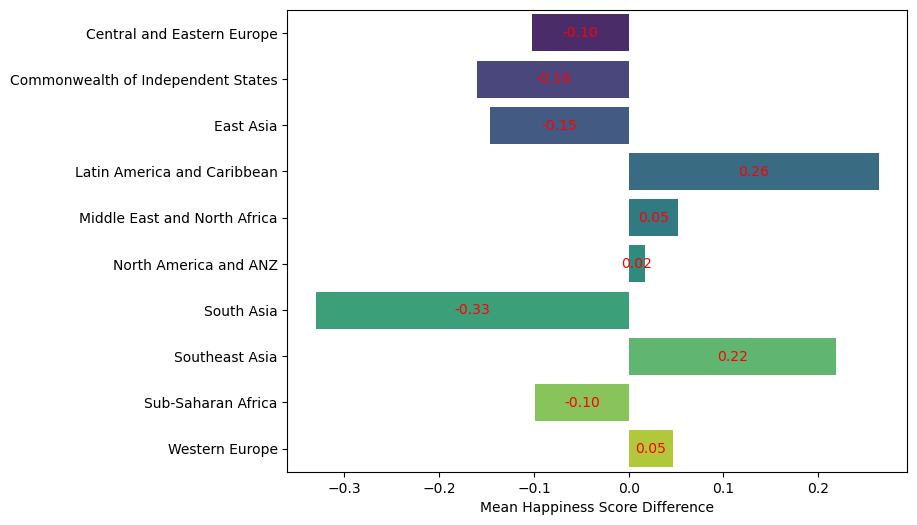

In [303]:
df = mean_difference_per_region.reset_index()
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Ladder score difference', y='Regional indicator', data=df, palette='viridis')
for p in barplot.patches:
    width = p.get_width()    # get bar length
    plt.text(width / 2,       # position the text at the center of the bar
             p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
             '{:1.2f}'.format(width), # format the value to 2 decimal places
             ha = 'center',   # horizontal alignment can be left, right or center
             va = 'center', # vertical alignment can be top, bottom or center
             color = 'red') # set the color of the text to red

plt.xlabel('Mean Happiness Score Difference')
plt.ylabel('')
plt.show()

In [304]:
regions = merged_df_subset['Regional indicator'].unique()

for region in regions:
    region_data = merged_df_subset[merged_df_subset['Regional indicator'] == region]
    t_stat, p_value = ttest_rel(region_data['Ladder score 2020'], region_data['Ladder score 2021'])
    print(f"Region: {region}, T statistic: {t_stat}, P-value: {p_value}")

Region: Central and Eastern Europe, T statistic: 1.9010335761734694, P-value: 0.07668666729788311
Region: Latin America and Caribbean, T statistic: -5.000408006768091, P-value: 0.000537010564102575
Region: North America and ANZ, T statistic: -0.5011222417947562, P-value: 0.6507452782556737
Region: Western Europe, T statistic: -1.5159734297539975, P-value: 0.14689093341315104
Region: Middle East and North Africa, T statistic: -0.8666335191164457, P-value: 0.4064564285884279
Region: South Asia, T statistic: 4.377483443708613, P-value: 0.14297711668331628
Region: Sub-Saharan Africa, T statistic: 1.0559538283204992, P-value: 0.3102187695609353
Region: Southeast Asia, T statistic: -1.186275749513563, P-value: 0.3011596515583836
Region: East Asia, T statistic: 1.5540478070662254, P-value: 0.18088741015130494
Region: Commonwealth of Independent States, T statistic: 1.8993921398585072, P-value: 0.10625934451616526


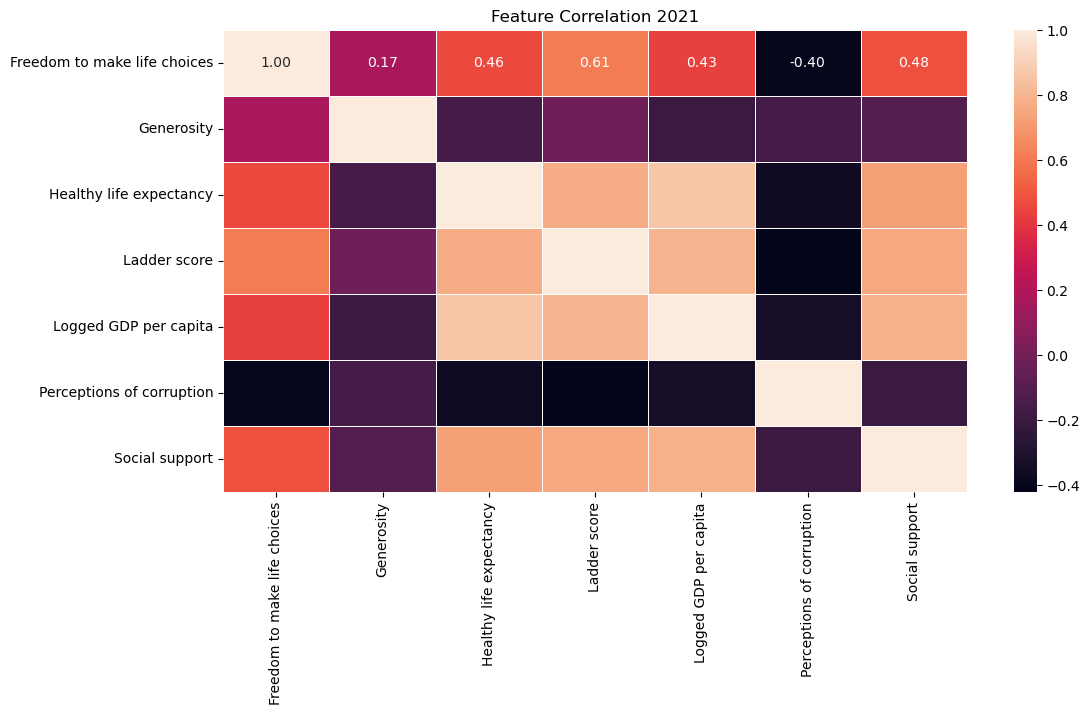

In [305]:
df2021regresion = df2021.copy().drop(columns = ["Country name","Regional indicator", "year"])
plt.figure(figsize = (12, 6))
sns.heatmap(df2021regresion.corr(), annot = True, fmt = '.2f', linewidth = 0.7, annot_kws={"size": 10})  # Decrease the font size
plt.title("Feature Correlation 2021")
plt.show()

In [306]:
# Assuming 'df2021regression' is your DataFrame
correlation = df2021regresion.corr()['Ladder score']
print(correlation)

Freedom to make life choices    0.607753
Generosity                     -0.017799
Healthy life expectancy         0.768099
Ladder score                    1.000000
Logged GDP per capita           0.789760
Perceptions of corruption      -0.421140
Social support                  0.756888
Name: Ladder score, dtype: float64


c:\Users\maryn\anaconda3\envs\stat_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maryn\anaconda3\envs\stat_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maryn\anaconda3\envs\stat_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maryn\anaconda3\envs\stat_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

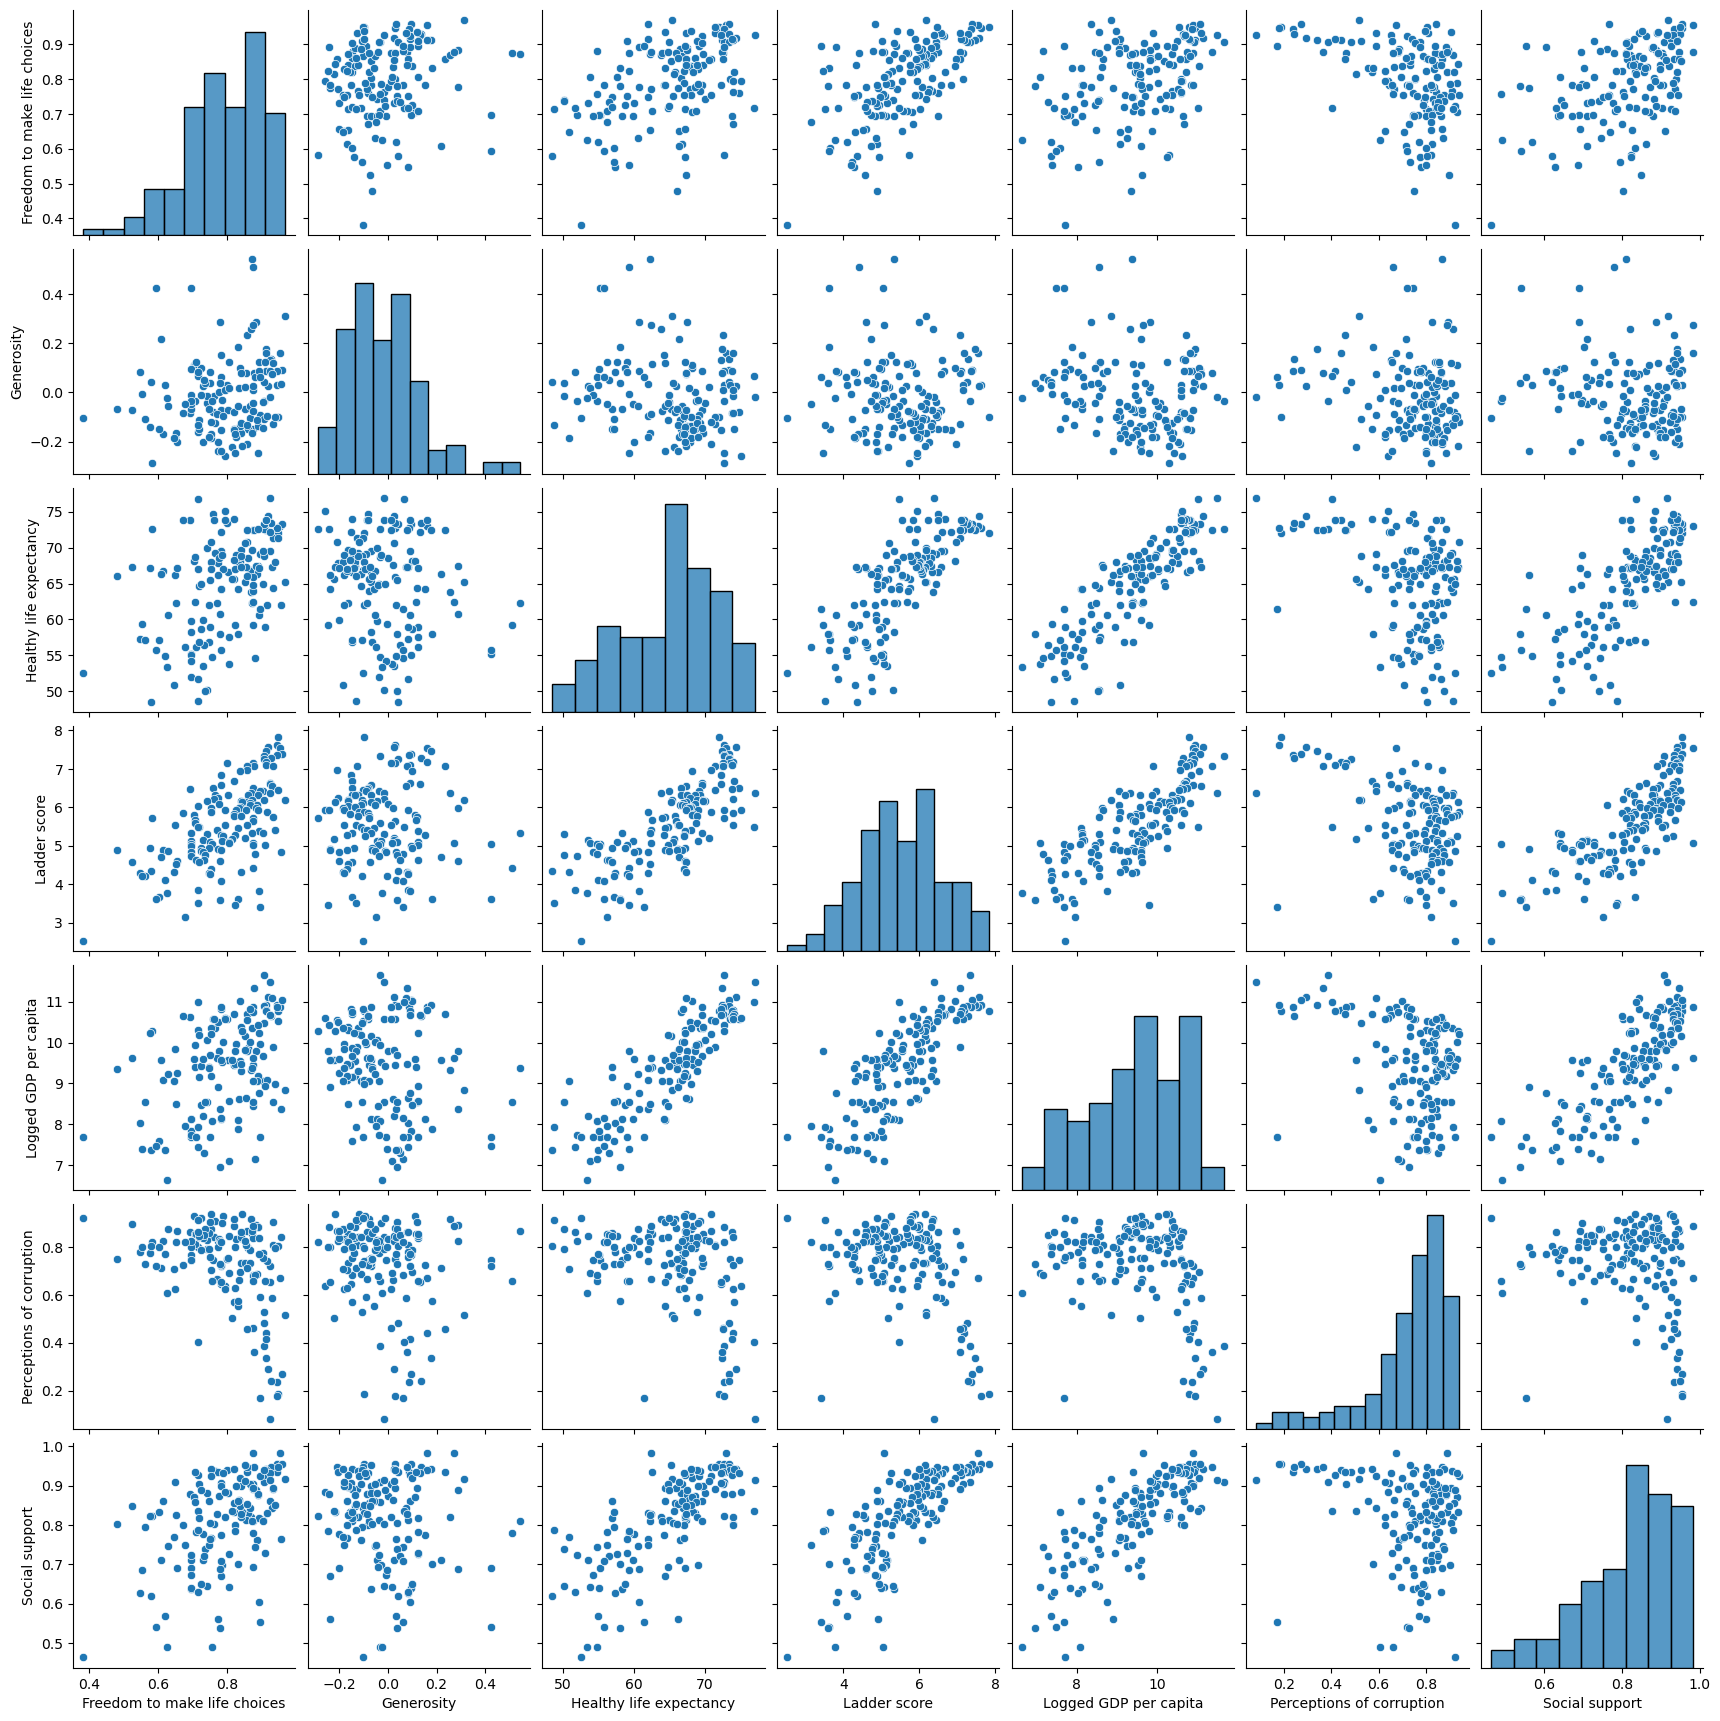

In [307]:
import seaborn as sns

sns.pairplot(df2021regresion)
plt.show()

In [308]:
X = df2021regresion.drop(columns = ["Ladder score", "Generosity"])
Y = df2021regresion["Ladder score"]

Xreg = sm.add_constant(X)
Yreg = Y

model = sm.OLS(Yreg, Xreg, prepend=True).fit()
display(model.summary())

c:\Users\maryn\anaconda3\envs\stat_env\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['prepend']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Ladder score   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     87.49
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           9.68e-42
Time:                        07:24:41   Log-Likelihood:                -117.18
No. Observations:                 149   AIC:                             246.4
Df Residuals:                     143   BIC:                             264.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.1104      0.621     -3.398      0.001      -3.338      -0.883
Freedom to make life choices     2.1327      0.483      4.412      0.000       1.177       3.088
Healthy life expectancy          0.0294      0.013      2.204      0.029       0.003       0.056
Logged GDP per capita            0.2640      0.086      3.075      0.003       0.094       0.434
Perceptions of corruption       -0.6678      0.285     -2.339      0.021      -1.232      -0.103
Social support                   2.5067      0.668      3.751      0.000       1.186       3.828
==============================================================================
Omnibus:                       13.817   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.955
Skew:                          -0.687   Prob(JB):                     0.000566
Kurtosis:                       3.723   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [309]:
print("LM-test: ", white(model.resid,Xreg)[1], 2*"\n", "F-test: ", white(model.resid,Xreg)[3])

LM-test:  0.002652193387433833 

 F-test:  0.000967892220744837


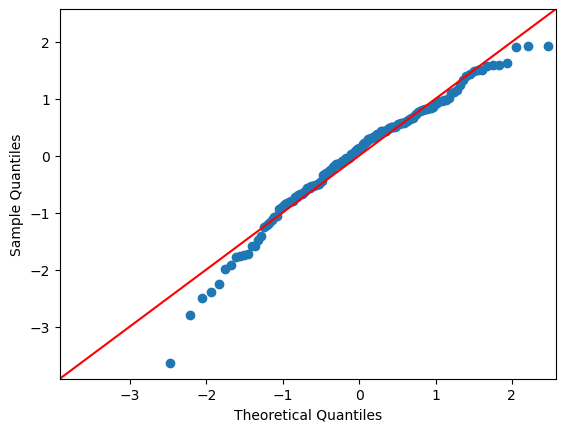

In [310]:
residuals = model.resid
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()

Normality of Residuals: Q-Q Plot. Residuals fall on the red line if normally distriuted

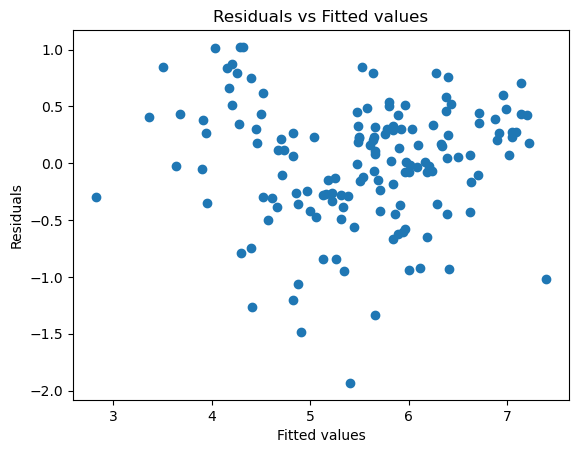

In [311]:
fitted_values = model.predict(Xreg)
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

Homoscedasticity: You can use a scatter plot of residuals vs fitted values to check for homoscedasticity. The variance of the residuals should be constant across all levels of the independent variables.

In [312]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor                      features
0   62.375937  Freedom to make life choices
1  322.423478       Healthy life expectancy
2  335.106315         Logged GDP per capita
3   12.167618     Perceptions of corruption
4  148.574033                Social support


In [314]:
predictions = model.predict(Xreg)
mse = mean_squared_error(Y, predictions)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

MSE:  0.28222923287254853
RMSE:  0.5312525132858653
